# Tarea5
## Statistical Decision Theory 

### INTRODUCCION
En este capítulo sentamos las bases estadísticas básicas para el diseño de detectores de señales en ruido. Los enfoques siguen directamente de la teoría de la prueba de hipótesis. En particular, abordamos el problema de la prueba de hipótesis simple en el que el PDF para cada hipótesis asumida es completamente conocido. Los enfoques primarios para las pruebas de hipótesis simples son el enfoque clásico basado en el teorema de Neyman-Pearson y el enfoque bayesiano basado en la minimización del riesgo de Bayes. En muchos sentidos, estos enfoques son análogos a los métodos clásicos y bayesianos de la teoría de la estimación estadística. El método particular empleado depende de nuestra voluntad de incorporar el conocimiento previo sobre las probabilidades de ocurrencia de las diversas hipótesis. La elección de un enfoque apropiado es, por lo tanto, dictada por el problema en cuestión. Los sistemas de sonar y radar suelen utilizar el criterio de Neyman-Pearson, mientras que los sistemas de comunicación y reconocimiento de patrones emplean el riesgo de Bayes.


### Dc Lecvel in WGN Neyman Pearson theory
Ahora considere el problema más general de detección de señal 
$$H_0: x[n] = w [n] \qquad n = 0,1, ..., N-1$$
$$H_1: x[n] = A + w [n] \qquad n = 0,1, ..., N-1$$

donde la señal es $s[n] = A$ para $A > 0$ y $w [n] $es WGN con varianza $, \sigma^2$.tenga en cuenta que el problema actual es en realidad una prueba de la media de un PDF gaussiano multivariado. Esto se debe a que bajo $H_0, x \sim N(0, \sigma^2I)$ mientras que bajo$H_1, x \sim N(A1, \sigma^2I)$  donde 1 es el vector de todos. Por lo tanto, tenemos equivalentemente
$$H_0: \mu = 0$$
$$H_1: \mu = A1$$

In [62]:
import numpy as np
import matplotlib
from scipy.stats import norm
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
#----------------------------------------------------------------------
# ejemplo: Dc Lecvel
N =1; #numero de puntos
var = 1;#Varianza;
A1=5
mean = 0 
H0=np.random.normal(0,var,N)
H1=np.random.normal(A1,var,N)
#----------------------------------------------------------------------
X = np.concatenate((H0,H1))[:, np.newaxis]
#----------------------------------------------------------------------
#funcion de probabilidad señal + ruido
X_plot = np.linspace(-5, 10, 100)[:, np.newaxis]

true_dens = (norm(0,var ).pdf(X_plot[:, 0])
             + norm(A1, var).pdf(X_plot[:, 0]))


El desempeño del detector depende de la diferencia entre funciones pdf
$$P(x[0],H_0) = \frac{1}{\sqrt{2\pi\sigma^2}} \; \exp\bigg(-\frac{1}{2\sigma^2} x^2[0]\bigg)$$
$$P(x[0],H_1) = \frac{1}{\sqrt{2\pi\sigma^2}} \; \exp\bigg(-\frac{(x[0]-A)^2}{2\sigma^2} \bigg)$$

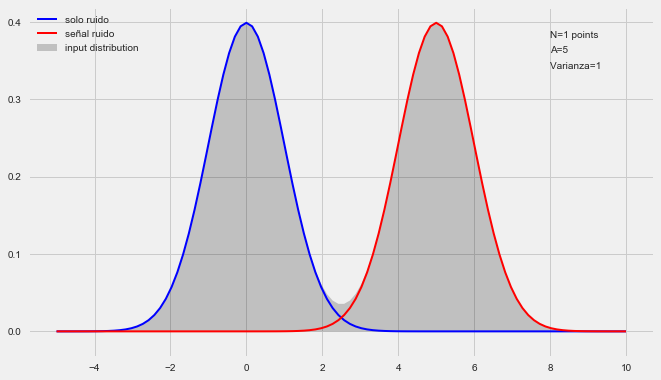

In [63]:
#----------------------------------------------------------------------
#graficas de distribucion  
fig, ax = plt.subplots(figsize=(10,6))
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')
#----------------------------------------------------------------------
#parametros
ax.text(8, 0.38, "N={0} points".format(N),fontsize=10)
ax.text(8, 0.36, "A={0} ".format(A1),fontsize=10)
ax.text(8, 0.34, "Varianza={0} ".format(var),fontsize=10)
#----------------------------------------------------------------------
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
#----------------------------------------------------------------------
ax.plot(X_plot[:, 0], norm(0,var ).pdf(X_plot[:, 0]), 'b-',linewidth=2,label="solo ruido")
#----------------------------------------------------------------------
ax.plot(X_plot[:, 0], norm(A1, var).pdf(X_plot[:, 0]), 'r-',linewidth=2,label="señal ruido")

ax.legend(loc='upper left',fontsize=10)


A menudo utilizaremos esta prueba de parámetros de la interpretación de PDF para describir un problema de detección de señal. Ahora el detector de NP decide 𝐻1

Teorema 3.1 (Neyman-Pearson) Para maximizar PD para un $P_{FA}$ dado $= 
\gamma$ decidir $H_1$ si  donde se encuentra el umbral de freí

$$L(x) = \frac{P(x,H_1)}{P(x,H_0)}>\gamma$$

 La función$ L (x)$ se denomina relación de likelihood ratio, ya que indica para cada valor de $x$ la likelihood  de $H_1$ contra la likelihood  de $H_0$  A continuación ilustramos la prueba de NP con algunos ejemplos.

$$\frac{\frac{1}{({2\pi\sigma^2})^{N/2}} \; \exp\bigg(-\frac{1}{2\sigma^2} \sum_{n=0}^{N-1}(x[n]-A)^2\bigg)}{\frac{1}{({2\pi\sigma^2})^{N/2}} \; \exp\bigg(-\frac{1}{2\sigma^2} \sum_{n=0}^{N-1}x^2[n]\bigg)}>\gamma $$

$$\exp\bigg(-\frac{1}{2\sigma^2} \sum_{n=0}^{N-1}(x[n]-A)^2- x^2[n]\bigg)>\gamma $$

tomando el logaritmo 

$$-\frac{1}{2\sigma^2} \sum_{n=0}^{N-1}(x^2[n]-2x[n]A-A^2- x^2[n])>ln \gamma $$
$$-\frac{1}{2\sigma^2} \sum_{n=0}^{N-1}(-2x[n]A-A^2)>ln\gamma $$
$$-\frac{1}{2\sigma^2} \sum_{n=0}^{N-1}(-2x[n]A)-\sum_{n=0}^{N-1}(A^2)>ln \gamma $$
$$-\frac{1}{2\sigma^2} \bigg(-2A\sum_{n=0}^{N-1}x[n] - NA^2\bigg)>ln \gamma $$
$$\frac{\sigma^2}{NA} \bigg(\frac{A}{\sigma ^2} \sum_{n=0}^{N-1}x[n]\bigg)>\frac{\sigma^2}{NA}\bigg(ln \gamma+\frac{NA^2}{2\sigma^2}\bigg) $$
$$\frac{1}{N} \sum_{n=0}^{N-1}x[n]>\frac{\sigma^2}{NA}ln \gamma+\frac{A}{2} $$



In [77]:
#humabral 
from scipy.stats import norm
gamm=norm.cdf(2)
gamma=(var/(N*A1))*np.log(gamm)+A1/2

El detector de NP compara la media de la muestral $\bar{X} = \frac{1}{N} \sum_{n=0}^{N-1}x[n]$ con un umbral $\gamma$. Esto es intuitivamente razonable, ya que $\bar{X}$ puede considerarse como una estimación de $A$. Si la estimación es grande y positiva, entonces la señal es probablemente presente Cuando la estimación debe ser grande, antes de que estemos dispuestos a declarar que una señal está presente, depende de nuestra preocupación de que el ruido solo puede causar una estimación grande. Para evitar esta posibilidad, ajustamos $\gamma'$ para controlar $P_{FA}$(probabilidad de falsa alarma), valores de umbral más altos con  $P_{FA}$ (así como $P_{D}$(probabilidad de detecion )). Para determinar el rendimiento de detección, primero observamos que el estadístico de prueba $T[X] = \frac{1}{N} \sum_{n=0}^{N-1}x[n]$ es gaussiano en cada hipótesis. Los medias y las variaciones son.

$$\gamma=\sqrt{\frac{\sigma ^2}{N}} Q^{-1}(P_{FA})$$

Donde $Q$ es para $N(0, 1)$
$$Q{(x)}=\frac{1}{\sqrt{2\pi}}\int_{x}^{\infty}{exp(-\frac{u^2}{2})} d_{u}$$ 
$$Q{(x)}=1-Q(-x)=1-\Phi (x)$$ 

Dónde $\Phi (x)$Es la función de distribución acumulativa de la distribución gaussiana normal .

Considerando una variable aleatoria gaussiana estandarizada $X$ con $\mu = 0$ y $\sigma^2= 1$, la probabilidad de que un valor observado de x sea mayor que v viene dada por la siguiente función Q:

$$Q{(x)}=\frac{1}{\sqrt{2\pi}}\int_{1,
5}^{\infty}{exp(-\frac{u^2}{2})} d_{u}$$ 

In [78]:
from scipy.integrate import quad
# Make a PDF for the normal distribution a function
def normalProbabilityDensity(x,mean,vari):
    constant = 1.0 / np.sqrt(2*np.pi*vari)
    return(constant * np.exp((-(x-mean)**2) / 2.0) )



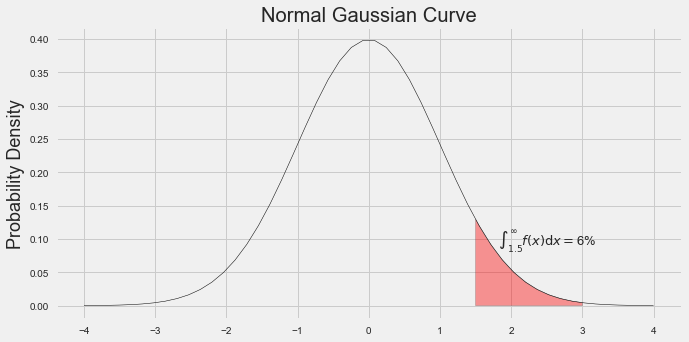

In [79]:
from matplotlib.patches import Polygon
a, b = 1.5, 3 # integral limits

xagaus = np.linspace(-4, 4)
yagaus  = normalProbabilityDensity(xagaus,0,1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(xagaus, yagaus, 'k', linewidth=.5)


# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix,0,1)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(2.5, .09, r"$\int_{1.5}^{∞}f(x)\mathrm{d}x=$" + "{0:.0f}%".format(0.065*100),
         horizontalalignment='center', fontsize=13);

ax.set_title('Normal Gaussian Curve')
ax.set_ylabel(r'Probability Density', fontsize = 18);


$$Q{(x)}=\frac{1}{\sqrt{2\pi}}\int_{X}^{\infty}{exp(-\frac{u^2}{2})} d_{u}$$ 
$$Q{(x)}=\frac{1}{\sqrt{2\pi}}\int_{X}^{\infty}{\frac{1}{u} u exp(-\frac{u^2}{2})} d_{u}$$ 
$$Q{(x)}=\frac{1}{\sqrt{2\pi}}\int_{X}^{\infty}{\frac{1}{u} u exp(-\frac{u^2}{2})} d_{u}$$ 
$$\int{f(x)g'(x)} d_{x}=f(x)g(x)-\int{f'(x)g(x)} d_{x}$$
$$f(x)=\frac{1}{u} \qquad g(x)=-exp(-\frac{u^2}{2}) $$
$$\int{ u exp(-\frac{u^2}{2})} d_{u}=-exp(-\frac{u^2}{2})$$ 

$$\frac{1}{\sqrt{2\pi}}\bigg[\frac{1}{u} \bigg(-exp\bigg(-\frac{u^2}{2}\bigg)\bigg)  \Big|_x^\infty    -         \int_{X}^{\infty}{-\frac{1}{u^2} -exp\bigg(-\frac{u^2}{2}\bigg)} d_{u}\bigg]$$

$$\frac{1}{\sqrt{2\pi}}\bigg[\frac{1}{x} \bigg(exp\bigg(-\frac{x^2}{2}\bigg)\bigg)   -           \int_{X}^{\infty}{\frac{1}{u^2} exp\bigg(-\frac{u^2}{2}\bigg)} d_{u}\bigg]$$

$$\frac{1}{\sqrt{2\pi}}\bigg[\frac{1}{x} \bigg(exp\bigg(-\frac{x^2}{2}\bigg)\bigg)   -           \int_{X}^{\infty}{\frac{1}{u^3}  u exp\bigg(-\frac{u^2}{2}\bigg)} d_{u}\bigg]$$


$$\frac{1}{\sqrt{2\pi}}\bigg[\frac{1}{x} \bigg(exp\bigg(-\frac{x^2}{2}\bigg)\bigg)   - \bigg[ \frac{1}{u^3}  -exp\bigg(-\frac{u^2}{2}\bigg)   \Big|_x^\infty    -  \int_{X}^{\infty}{\frac{-3}{u^4} -exp\bigg(-\frac{u^2}{2}\bigg)} d_{u}\bigg                ]\bigg ]$$
$$\frac{1}{\sqrt{2\pi}}\bigg[\frac{1}{x} \bigg(exp\bigg(-\frac{x^2}{2}\bigg)\bigg)   - \bigg[ \frac{1}{x^3} exp\bigg(-\frac{x^2}{2}\bigg)     -  \int_{X}^{\infty}{\frac{3}{u^4} exp\bigg(-\frac{u^2}{2}\bigg)} d_{u}\bigg                ]\bigg ]$$

$$\frac{1}{\sqrt{2\pi}}\bigg[\frac{1}{x} \bigg(exp\bigg(-\frac{x^2}{2}\bigg)\bigg)   -\frac{1}{x^3} exp\bigg(-\frac{x^2}{2}\bigg)     +  \int_{X}^{\infty}{\frac{3}{u^4} exp\bigg(-\frac{u^2}{2}\bigg)} d_{u}\bigg                ]$$

$$\frac{1}{\sqrt{2\pi}}\bigg[\frac{1}{x} exp\bigg(-\frac{x^2}{2}\bigg)   -\frac{1}{x^3} exp\bigg(-\frac{x^2}{2}\bigg)     +  \int_{X}^{\infty}{\frac{3}{u^5} u exp\bigg(-\frac{u^2}{2}\bigg)} d_{u}\bigg                ]$$

$$\frac{1}{\sqrt{2\pi}}\bigg[exp\bigg(-\frac{x^2}{2}\bigg)\bigg[ \frac{1}{x} -\frac{1}{x^3}+\frac{3}{x^5}+\frac{3*5}{x^7}\bigg]$$
en ultimas $Q{(x)}$se de define en series gometrica infinita

$$\frac{1}{\sqrt{2\pi}}exp\bigg(-\frac{x^2}{2}\bigg) \frac{1}{x} +\frac{1}{\sqrt{2\pi}}exp\bigg(-\frac{x^2}{2}\bigg)   \sum_{n=1}^{\infty} \frac{1}{x^{2n+1}} \frac{(2n-1)!}{(n-1)!} \frac{(-1)^n}{2^{n-1}}$$

$$Q{(x)}	\approx  \frac{1}{\sqrt{2\pi}} \frac{1}{x}exp\bigg(-\frac{x^2}{2}\bigg) \rightarrow lagrange $$

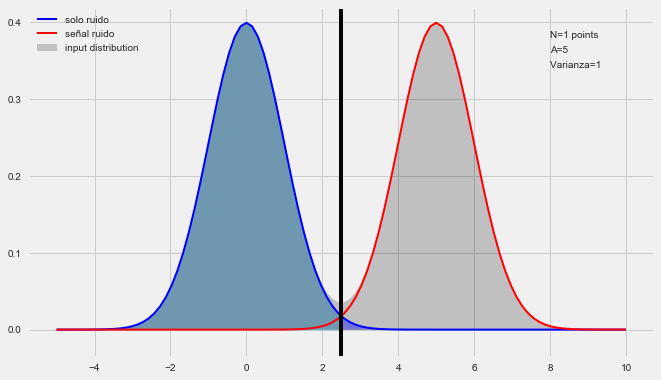

In [83]:
import scipy.stats

#----------------------------------------------------------------------
#graficas de distribucion  
fig, ax = plt.subplots(figsize=(10,6))
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')
#----------------------------------------------------------------------
#parametros
ax.text(8, 0.38, "N={0} points".format(N),fontsize=10)
ax.text(8, 0.36, "A={0} ".format(A1),fontsize=10)
ax.text(8, 0.34, "Varianza={0} ".format(var),fontsize=10)
#----------------------------------------------------------------------
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+m')
#----------------------------------------------------------------------
ax.plot(X_plot[:, 0], norm(0,var ).pdf(X_plot[:, 0]), 'b-',linewidth=2,label="solo ruido")
#----------------------------------------------------------------------
ax.plot(X_plot[:, 0], norm(A1, var).pdf(X_plot[:, 0]), 'r-',linewidth=2,label="señal ruido")
#----------------------------------------------------------------------
plt.axvline(gamma,color='k')
#----------------------------------------------------------------------
# FN
x_min = -4
ptx = np.linspace(x_min,gamma)
pty = scipy.stats.norm.pdf(ptx,mean,var)
plt.fill_between(ptx, pty, color='#89bedc', alpha='1.0')
#----------------------------------------------------------------------
#----------------------------------------------------------------------
# TP
a, b = gamma, 10 # integral limit
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix,0,1)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='b', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);
#----------------------------------------------------------------------
ax.legend(loc='upper left',fontsize=10)

Podemos relacionar la PD con la PFA de manera más directa si observamos que la función Q está disminuyendo de manera monótona, ya que 1 - Q es una FCD, que aumenta monótonamente. Por lo tanto, Q tiene un inverso que denotamos como r1. Como resultado, el umbral se encuentra desde (3.6) como

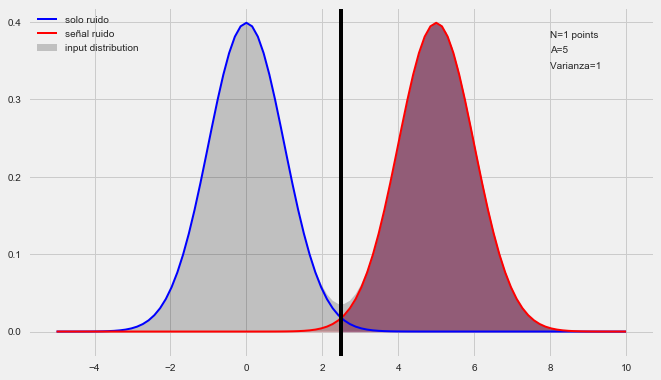

In [82]:
a, b = gamma, 10 # integral limit
#----------------------------------------------------------------------
#graficas de distribucion  
fig, ax = plt.subplots(figsize=(10,6))
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')
#----------------------------------------------------------------------
#parametros
ax.text(8, 0.38, "N={0} points".format(N),fontsize=10)
ax.text(8, 0.36, "A={0} ".format(A1),fontsize=10)
ax.text(8, 0.34, "Varianza={0} ".format(var),fontsize=10)
#----------------------------------------------------------------------
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+m')
#----------------------------------------------------------------------
ax.plot(X_plot[:, 0], norm(0,var ).pdf(X_plot[:, 0]), 'b-',linewidth=2,label="solo ruido")
#----------------------------------------------------------------------
ax.plot(X_plot[:, 0], norm(A1, var).pdf(X_plot[:, 0]), 'r-',linewidth=2,label="señal ruido")
#----------------------------------------------------------------------
plt.axvline(gamma,color='k')
#----------------------------------------------------------------------
# FN
x_min = -4
ptx = np.linspace(x_min,gamma)
pty = scipy.stats.norm.pdf(ptx,A1,var)
plt.fill_between(ptx, pty, color='#e1b1b4', alpha='1.0')
#----------------------------------------------------------------------
x_max = 10.0
ptx = np.linspace(gamma,x_max)
pty = scipy.stats.norm.pdf(ptx,A1,var)
plt.fill_between(ptx, pty, color='#b77495', alpha='1.0')
#----------------------------------------------------------------------
ax.legend(loc='upper left',fontsize=10)

In [90]:
from scipy.integrate import quad


tn_resruido, errruido = quad(normalProbabilityDensity, x_min, gamma, args=(0,var,))
fp_resruido, errruido = quad(normalProbabilityDensity, gamma, x_max, args=(0,var,))

fn_resseñal, errseñal = quad(normalProbabilityDensity, x_min, gamma, args=(A1,var,))
tp_resseñal, errseñal = quad(normalProbabilityDensity, gamma, x_max, args=(A1,var,))


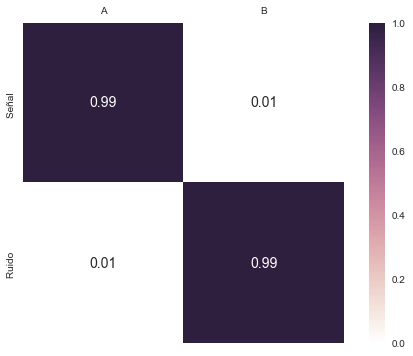

In [85]:

#!/usr/bin/env python

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

import seaborn as sns
import math

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib as mpl

mpl.style.use('seaborn')

conf_arr = np.array([[tp_resseñal,fn_resseñal],[fp_resruido,tn_resruido]])

df_cm = pd.DataFrame(conf_arr, 
  index = [ 'A', 'B'],
  columns = ['A', 'B'])

fig = plt.figure()

plt.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

res = sn.heatmap(df_cm, annot=True, vmin=0.0, vmax=1.0, fmt='.2f', cmap=cmap)

plt.yticks([0.5,1.5], [ 'Señal ', 'Ruido '], va='center')

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

plt.savefig('roc_curve_discrete_classifier_05.png', dpi=100, bbox_inches='tight' )



0.9937897272016403
0.99378972720164


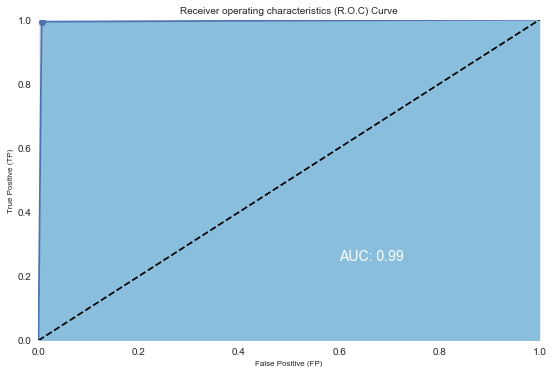

In [86]:
from scipy.integrate import quad
from scipy.integrate import simps

import matplotlib.pyplot as plt
import numpy as np

def slope(x1, y1, x2, y2):
    return (y2-y1)/(x2-x1)

fp = fp_resruido
tp = tp_resseñal

a = slope(0.0, 0.0, fp, tp)
b = 0.0

ptx = np.linspace(0, fp, 100)
pty = a * ptx + b

plt.fill_between(ptx, pty, color='#89bedc', alpha='1.0')

area_1 = simps(pty,ptx)

a = slope(fp, tp, 1.0, 1.0)
b = tp - a * fp

ptx = np.linspace(fp, 1.0, 100)
pty = a * ptx + b

plt.fill_between(ptx, pty, color='#89bedc', alpha='1.0')

area_2 = simps(pty,ptx)

auc_area = area_1 + area_2
print(auc_area)

auc_area = (1.0 - fp) * tp + 0.5 * fp * tp + 0.5 * (1.0 - fp) * (1.0 -tp) 
print(auc_area)

plt.text(0.6, 0.25, 'AUC: '+str(round(auc_area,2)),color='white',fontsize=14)

plt.scatter(fp,tp)

plt.plot([0,fp,1],[0,tp,1])
plt.plot([0.0,1.0],[0.0,1.0],'k--')
plt.xlim(0,1)
plt.ylim(0,1)

plt.xlabel('False Positive (FP)',fontsize=8)
plt.ylabel('True Positive (TP)',fontsize=8)

plt.title('Receiver operating characteristics (R.O.C) Curve',fontsize=10)

plt.savefig("roc_curve_discrete_classifier_07.png")

# Cambio en la varianza

Este ejemplo de prueba de hipótesis ilustra que un cambio en la varianza de una estadística de Gaus-sian se puede utilizar para distinguir entre dos hipótesis. Observamos $x [n] para n = 0, 1,. . . , N - 1, $donde las $x [n] $son independientes e idénticamente distribuidas (IID). 

$$\frac{\frac{1}{({2\pi\sigma^2_{1}})^{N/2}} \; \exp\bigg(-\frac{1}{2\sigma^2_{1}} \sum_{n=0}^{N-1}x^2[n]\bigg)}{\frac{1}{({2\pi\sigma^2_{0}})^{N/2}} \; \exp\bigg(-\frac{1}{2\sigma^2_{0}} \sum_{n=0}^{N-1}x^2[n]\bigg)}>\gamma $$

$$\frac{({2\pi\sigma^2_{0}})^{N/2}}{({2\pi\sigma^2_{1}})^{N/2}}   \exp\bigg(-\frac{1}{2\sigma^2_{1}} \sum_{n=0}^{N-1}x^2[n]+\frac{1}{2\sigma^2_{0}} \sum_{n=0}^{N-1}x^2[n]\bigg)>\gamma $$

$$\frac{{\sigma^2_{0}}^{N/2}}{{\sigma^2_{1}}^{N/2}}   \exp\bigg(-\frac{1}{2}\bigg(\frac{1}{\sigma^2_{1}}-\frac{1}{\sigma^2_{0}}\bigg)
 \sum_{n=0}^{N-1}x^2[n]\bigg)>\gamma $$

tomando el logaritmo 

$$\frac{N}{2} ln{\sigma^2_{0}} - \frac{N}{2} ln {{\sigma^2_{1}}}  -\frac{1}{2}\bigg(\frac{1}{\sigma^2_{1}}-\frac{1}{\sigma^2_{0}}\bigg)
 \sum_{n=0}^{N-1}x^2[n]>ln \gamma $$
 
$$-\frac{N}{2} \bigg(ln{\sigma^2_{1}} - ln {{\sigma^2_{0}}} \bigg) -\frac{1}{2}\bigg(\frac{1}{\sigma^2_{1}}-\frac{1}{\sigma^2_{0}}\bigg)
 \sum_{n=0}^{N-1}x^2[n]>ln \gamma $$
 
$$-\frac{N}{2} ln \frac{\sigma^2_{1}}{\sigma^2_{0}}   -\frac{1}{2}\bigg(\frac{1}{\sigma^2_{1}}-\frac{1}{\sigma^2_{0}}\bigg)
 \sum_{n=0}^{N-1}x^2[n]>ln \gamma $$
 
$$  -\frac{1}{2}\bigg(\frac{1}{\sigma^2_{1}}-\frac{1}{\sigma^2_{0}}\bigg)
 \sum_{n=0}^{N-1}x^2[n]>ln \gamma +\frac{N}{2} ln \frac{\sigma^2_{1}}{\sigma^2_{0}}  $$
 
$$\frac{2}{N} \bigg(-\frac{1}{2}\bigg(\frac{1}{\sigma^2_{1}}-\frac{1}{\sigma^2_{0}}\bigg) \sum_{n=0}^{N-1}x^2[n] \bigg)>\frac{2}{N}\bigg(ln \gamma +\frac{N}{2} ln \frac{\sigma^2_{1}}{\sigma^2_{0}}  \bigg) $$

$$\frac{1}{N} \sum_{n=0}^{N-1}x^2[n] >\frac{\frac{2}{N}ln \gamma + ln \frac{\sigma^2_{1}}{\sigma^2_{0}} }{\frac{1}{\sigma^2_{0}}-\frac{1}{\sigma^2_{1}}}  $$

$$\gamma'=\frac{\frac{2}{N}ln \gamma + ln \frac{\sigma^2_{1}}{\sigma^2_{0}} }{\frac{1}{\sigma^2_{0}}-\frac{1}{\sigma^2_{1}}} $$

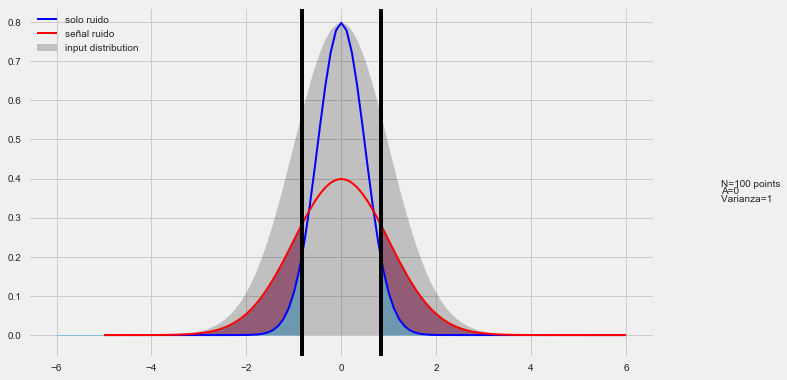

In [87]:
import numpy as np
import matplotlib
from scipy.stats import norm
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
#----------------------------------------------------------------------
# ejemplo: Dc Lecvel
N =100; #numero de puntos
var1 = 0.5;#Varianza;
var2 = 1;#Varianza;
A1=0
mean = 0 
H0=np.random.normal(0,var1,N)
H1=np.random.normal(A1,var2,N)
#----------------------------------------------------------------------
X = np.concatenate((H0,H1))[:, np.newaxis]
#----------------------------------------------------------------------
#funcion de probabilidad señal + ruido
X_plot = np.linspace(-5, 6, 100)[:, np.newaxis]

true_dens = (norm(0,var ).pdf(X_plot[:, 0])
             + norm(A1, var).pdf(X_plot[:, 0]))
#----------------------------------------------------------------------
#humabral 
from scipy.stats import norm
gamm=norm.ppf(0.90)
gamma=((2/N)*np.log(gamm)+np.log(var2/var1))*((1/var1)-(1/var2))
gamma=np.sqrt(gamma)

#----------------------------------------------------------------------
#graficas de distribucion  
fig, ax = plt.subplots(figsize=(10,6))
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')
#----------------------------------------------------------------------
#parametros
ax.text(8, 0.38, "N={0} points".format(N),fontsize=10)
ax.text(8, 0.36, "A={0} ".format(A1),fontsize=10)
ax.text(8, 0.34, "Varianza={0} ".format(var),fontsize=10)
#----------------------------------------------------------------------
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
#----------------------------------------------------------------------
ax.plot(X_plot[:, 0], norm(0,var1 ).pdf(X_plot[:, 0]), 'b-',linewidth=2,label="solo ruido")
#----------------------------------------------------------------------
ax.plot(X_plot[:, 0], norm(A1, var2).pdf(X_plot[:, 0]), 'r-',linewidth=2,label="señal ruido")
#----------------------------------------------------------------------
plt.axvline(gamma,color='k')
plt.axvline(-gamma,color='k')
#----------------------------------------------------------------------
# FN

x_max = 6.0
ptx = np.linspace(gamma,x_max, N)
pty = scipy.stats.norm.pdf(ptx,A1,var2)
plt.fill_between(ptx, pty, color='#b77495', alpha='1.0')
#----------------------------------------------------------------------
x_max = 6.0
ptx = np.linspace(-gamma,-x_max, N)
pty = scipy.stats.norm.pdf(ptx,A1,var2)
plt.fill_between(ptx, pty, color='#b77495', alpha='1.0')
ax.legend(loc='upper left',fontsize=10)
#----------------------------------------------------------------------
x_max = 6.0
ptx = np.linspace(-gamma,-x_max, N)
pty = scipy.stats.norm.pdf(ptx,A1,var1)
plt.fill_between(ptx, pty, color='#89bedc', alpha='1.0')
ax.legend(loc='upper left',fontsize=10)
#----------------------------------------------------------------------
x_max = 6.0
ptx = np.linspace(gamma,x_max, N)
pty = scipy.stats.norm.pdf(ptx,A1,var1)
plt.fill_between(ptx, pty, color='#89bedc', alpha='1.0')
ax.legend(loc='upper left',fontsize=10)

# FOB desde bayes :maxima verosimilitud

En algunos problemas de detección, se pueden asignar probabilidades razonablemente a las diversas hipótesis. Al hacerlo, expresamos una creencia previa en la probabilidad de las hipótesis. Un ejemplo es en las comunicaciones digitales en las que la transmisión de un "0" o "1" es igualmente probable. Entonces, es razonable asignar probabilidades iguales a $H_0$ ("0" enviado) y $H_1$ ("1" enviado). Decimos que $P(H_0)= P(H_1)= 1/2$, donde $P(H_0)$, $P(H_1)$ son las probabilidades previas de las hipótesis respectivas. En otras aplicaciones, como sonar o radar, esto no es posible. Si uno está intentando detectar un submarino enemigo, la probabilidad de su aparición generalmente no se puede determinar. Este tipo de enfoque, donde asignamos probabilidades previas, es el enfoque bayesiano a la prueba de hipótesis. Es completamente análogo a la filosofía bayesiana de la teoría de la estimación en la que un PDF anterior se asigna a un parámetro desconocido. Con el paradigma bayesiano podemos definir una probabilidad de error Pe es

$$P_{E}=P_{r}(decideH_0,H_1 verdadera)+P_{r}(decideH_1,H_0 verdadera)$$
$$P_{E}=P(H_0|H_1 )P(H_1)+P(H_1|H_0 )P(H_0)$$

donde $P(H_i|H_j )$ es la probabilidad condicional que indica la probabilidad de descodificar $H_i$ cuando $H_j$es verdadero. Observe la leve distinción entre $P(H_i;H_j )$ del enfoque NP y $P(H_i|H_j )$ del enfoque bayesiano: 



El primero es la probabilidad de decidir $H_i$ si $H_j$ es verdadero sin un significado probabilístico asignado a la probabilidad de que $H_i$ es cierto.Este último asume que se observa que el resultado de un experimento probabilístico es $H_j$y que la probabilidad de decidir está condicionada$H_i$ a ese resultado. Al utilizar el criterio $P_{E}$, los dos errores se ponderan de manera adecuada para obtener una medida de error general. Nuestro objetivo será diseñar un detector que minimice el $P_{E}$.  

Teorema 3.1 maxima verosimilitud
$$L(x) = \frac{P(x,H_1)}{P(x,H_0)}>1$$


$$\frac{\frac{1}{({2\pi\sigma^2})^{N/2}} \; \exp\bigg(-\frac{1}{2\sigma^2} \sum_{n=0}^{N-1}(x[n]-A)^2\bigg)}{\frac{1}{({2\pi\sigma^2})^{N/2}} \; \exp\bigg(-\frac{1}{2\sigma^2} \sum_{n=0}^{N-1}x^2[n]\bigg)}>1 $$

$$-\frac{1}{2\sigma^2} \sum_{n=0}^{N-1}(x^2[n]-2x[n]A-A^2- x^2[n])>ln 1 $$
$$-\frac{1}{2\sigma^2} \sum_{n=0}^{N-1}(-2x[n]A-A^2)>0 $$
$$-\frac{1}{2\sigma^2} \sum_{n=0}^{N-1}(-2x[n]A)-\sum_{n=0}^{N-1}(A^2)>0 $$
$$-\frac{1}{2\sigma^2} \bigg(-2A\sum_{n=0}^{N-1}x[n] - NA^2\bigg)>0 $$

$$\frac{\sigma^2}{NA} \bigg(\frac{A}{\sigma ^2} \sum_{n=0}^{N-1}x[n]\bigg)>\frac{\sigma^2}{NA}\bigg(\frac{NA^2}{2\sigma^2}\bigg) $$

$$\frac{1}{N} \sum_{n=0}^{N-1}x[n]>\frac{A}{2} $$

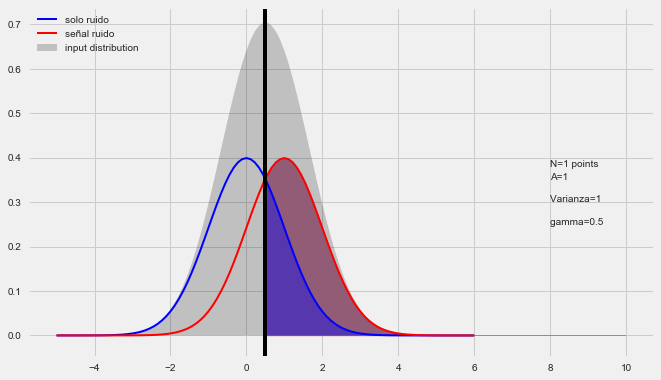

In [88]:
import numpy as np
import matplotlib
from scipy.stats import norm
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
#----------------------------------------------------------------------
# ejemplo: Dc Lecvel
N =1; #numero de puntos
var = 1;#Varianza;
A1=1
mean = 0 
H0=np.random.normal(0,var,N)
H1=np.random.normal(A1,var,N)
#----------------------------------------------------------------------
X = np.concatenate((H0,H1))[:, np.newaxis]
#----------------------------------------------------------------------
#funcion de probabilidad señal + ruido
X_plot = np.linspace(-5, 6, 100)[:, np.newaxis]

true_dens = (norm(0,var ).pdf(X_plot[:, 0])
             + norm(A1, var).pdf(X_plot[:, 0]))
#----------------------------------------------------------------------
#humabral 
from scipy.stats import norm
gamma=A1/2

#----------------------------------------------------------------------
#graficas de distribucion  
fig, ax = plt.subplots(figsize=(10,6))
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')
#----------------------------------------------------------------------
#parametros
ax.text(8, 0.38, "N={0} points".format(N),fontsize=10)
ax.text(8, 0.35, "A={0} ".format(A1),fontsize=10)
ax.text(8, 0.30, "Varianza={0} ".format(var),fontsize=10)
ax.text(8, 0.25, "gamma={0} ".format(gamma),fontsize=10)
#----------------------------------------------------------------------
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
#----------------------------------------------------------------------
ax.plot(X_plot[:, 0], norm(0,var ).pdf(X_plot[:, 0]), 'b-',linewidth=2,label="solo ruido")
#----------------------------------------------------------------------
ax.plot(X_plot[:, 0], norm(A1,var).pdf(X_plot[:, 0]), 'r-',linewidth=2,label="señal ruido")
#----------------------------------------------------------------------
plt.axvline(gamma,color='k')


#----------------------------------------------------------------------
# FN
a, b = gamma, 10 # integral limit
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix,0,1)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='b', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);
#----------------------------------------------------------------------
#----------------------------------------------------------------------
# TP

a, b = gamma, 10 # integral limit
x_max = 6.0
ptx = np.linspace(a,x_max)
pty = scipy.stats.norm.pdf(ptx,A1,var)
plt.fill_between(ptx, pty, color='#b77495', alpha='1.0')
ax.legend(loc='upper left',fontsize=10)


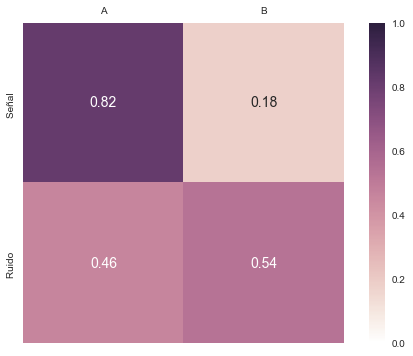

In [93]:
from scipy.integrate import quad

tn_resruido, errruido = quad(normalProbabilityDensity, x_min, gamma, args=(0,var,))
fp_resruido, errruido = quad(normalProbabilityDensity, gamma, x_max, args=(0,var,))
fn_resseñal, errseñal = quad(normalProbabilityDensity, x_min, gamma, args=(A1,var,))
tp_resseñal, errseñal = quad(normalProbabilityDensity, gamma, x_max, args=(A1,var,))
#----------------------------------------------------------------------
#----------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

import seaborn as sns
import math

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib as mpl

mpl.style.use('seaborn')

conf_arr = np.array([[tp_resseñal,fn_resseñal],[fp_resruido,tn_resruido]])

df_cm = pd.DataFrame(conf_arr, 
  index = [ 'A', 'B'],
  columns = ['A', 'B'])

fig = plt.figure()

plt.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

res = sn.heatmap(df_cm, annot=True, vmin=0.0, vmax=1.0, fmt='.2f', cmap=cmap)

plt.yticks([0.5,1.5], [ 'Señal ', 'Ruido '], va='center')

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

plt.savefig('roc_curve_discrete_classifier_05.png', dpi=100, bbox_inches='tight' )


0.6775240313020825
0.6775240313020825


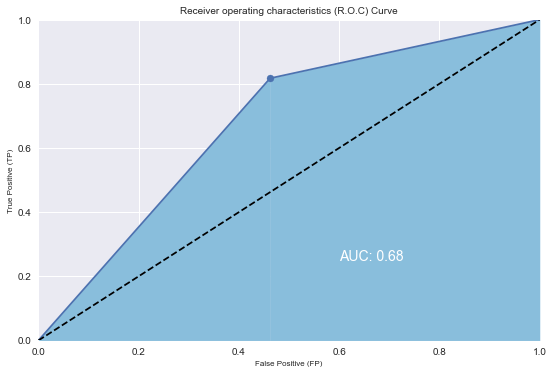

In [94]:
from scipy.integrate import quad
from scipy.integrate import simps

import matplotlib.pyplot as plt
import numpy as np

def slope(x1, y1, x2, y2):
    return (y2-y1)/(x2-x1)

fp = fp_resruido
tp = tp_resseñal

a = slope(0.0, 0.0, fp, tp)
b = 0.0

ptx = np.linspace(0, fp, 100)
pty = a * ptx + b

plt.fill_between(ptx, pty, color='#89bedc', alpha='1.0')

area_1 = simps(pty,ptx)

a = slope(fp, tp, 1.0, 1.0)
b = tp - a * fp

ptx = np.linspace(fp, 1.0, 100)
pty = a * ptx + b

plt.fill_between(ptx, pty, color='#89bedc', alpha='1.0')

area_2 = simps(pty,ptx)

auc_area = area_1 + area_2
print(auc_area)

auc_area = (1.0 - fp) * tp + 0.5 * fp * tp + 0.5 * (1.0 - fp) * (1.0 -tp) 
print(auc_area)

plt.text(0.6, 0.25, 'AUC: '+str(round(auc_area,2)),color='white',fontsize=14)

plt.scatter(fp,tp)

plt.plot([0,fp,1],[0,tp,1])
plt.plot([0.0,1.0],[0.0,1.0],'k--')
plt.xlim(0,1)
plt.ylim(0,1)

plt.xlabel('False Positive (FP)',fontsize=8)
plt.ylabel('True Positive (TP)',fontsize=8)

plt.title('Receiver operating characteristics (R.O.C) Curve',fontsize=10)

plt.savefig("roc_curve_discrete_classifier_07.png")

## Maximo posterior
$$L(x) = \frac{P(x|H_1)}{P(x|H_0)}>\frac{P(H_1)}{P(H_0)}=\gamma$$

$$\frac{1}{N} \sum_{n=0}^{N-1}x[n]>\frac{\sigma^2}{NA}ln \frac{P(H_1)}{P(H_0)}+\frac{A}{2} $$

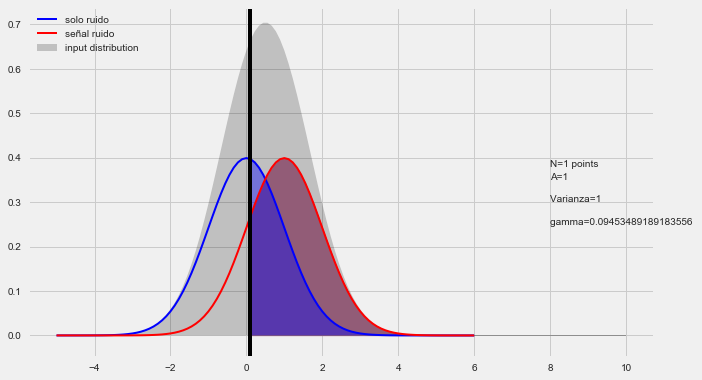

In [97]:
import numpy as np
import matplotlib
from scipy.stats import norm
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
#----------------------------------------------------------------------
# ejemplo: Dc Lecvel
N =1; #numero de puntos
var = 1;#Varianza;
A1=1
mean = 0 
H0=np.random.normal(0,var,N)
H1=np.random.normal(A1,var,N)
#----------------------------------------------------------------------
X = np.concatenate((H0,H1))[:, np.newaxis]
#----------------------------------------------------------------------
#funcion de probabilidad señal + ruido
X_plot = np.linspace(-5, 6, 100)[:, np.newaxis]

true_dens = (norm(0,var ).pdf(X_plot[:, 0])
             + norm(A1, var).pdf(X_plot[:, 0]))
#----------------------------------------------------------------------
#humabral 
from scipy.stats import norm
PH1=3/4
PH0=1/2
gamma=(var/(N*A1))*np.log(PH0/PH1)+A1/2

#----------------------------------------------------------------------
#graficas de distribucion  
fig, ax = plt.subplots(figsize=(10,6))
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')
#----------------------------------------------------------------------
#parametros
ax.text(8, 0.38, "N={0} points".format(N),fontsize=10)
ax.text(8, 0.35, "A={0} ".format(A1),fontsize=10)
ax.text(8, 0.30, "Varianza={0} ".format(var),fontsize=10)
ax.text(8, 0.25, "gamma={0} ".format(gamma),fontsize=10)
#----------------------------------------------------------------------
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
#----------------------------------------------------------------------
ax.plot(X_plot[:, 0], norm(0,var ).pdf(X_plot[:, 0]), 'b-',linewidth=2,label="solo ruido")
#----------------------------------------------------------------------
ax.plot(X_plot[:, 0], norm(A1,var).pdf(X_plot[:, 0]), 'r-',linewidth=2,label="señal ruido")
#----------------------------------------------------------------------
plt.axvline(gamma,color='k')


#----------------------------------------------------------------------
# FN
a, b = gamma, 10 # integral limit
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix,0,1)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='b', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);
#----------------------------------------------------------------------
#----------------------------------------------------------------------
# TP

a, b = gamma, 10 # integral limit
x_max = 6.0
ptx = np.linspace(a,x_max)
pty = scipy.stats.norm.pdf(ptx,A1,var)
plt.fill_between(ptx, pty, color='#b77495', alpha='1.0')
ax.legend(loc='upper left',fontsize=10)




In [109]:
from scipy.integrate import quad

tn_resruido, errruido = quad(normalProbabilityDensity, x_min, gamma, args=(0,var))
fp_resruido, errruido = quad(normalProbabilityDensity, gamma, x_max, args=(0,var))
fn_resseñal, errseñal = quad(normalProbabilityDensity, x_min, gamma, args=(A1,var))
tp_resseñal, errseñal = quad(normalProbabilityDensity, gamma, x_max, args=(A1,var))
gamma

0.09453489189183556

0.09453489189183556

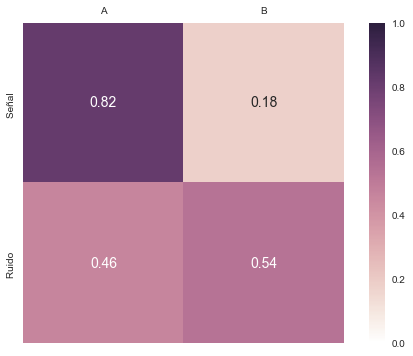

In [100]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

import seaborn as sns
import math

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib as mpl

mpl.style.use('seaborn')

conf_arr = np.array([[tp_resseñal,fn_resseñal],[fp_resruido,tn_resruido]])

df_cm = pd.DataFrame(conf_arr, 
  index = [ 'A', 'B'],
  columns = ['A', 'B'])

fig = plt.figure()

plt.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

res = sn.heatmap(df_cm, annot=True, vmin=0.0, vmax=1.0, fmt='.2f', cmap=cmap)

plt.yticks([0.5,1.5], [ 'Señal ', 'Ruido '], va='center')

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

plt.savefig('roc_curve_discrete_classifier_05.png', dpi=100, bbox_inches='tight' )



0.6775240313020825
0.6775240313020825


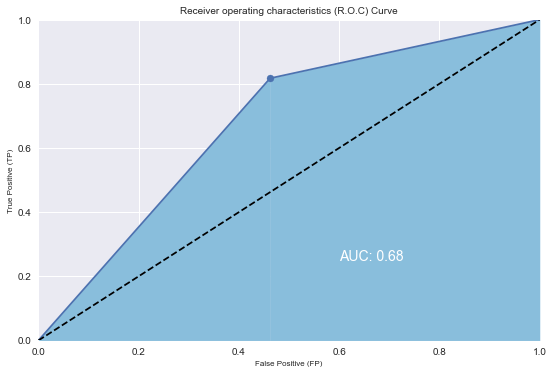

In [99]:
from scipy.integrate import quad
from scipy.integrate import simps

import matplotlib.pyplot as plt
import numpy as np

def slope(x1, y1, x2, y2):
    return (y2-y1)/(x2-x1)

fp = fp_resruido
tp = tp_resseñal

a = slope(0.0, 0.0, fp, tp)
b = 0.0

ptx = np.linspace(0, fp, 100)
pty = a * ptx + b

plt.fill_between(ptx, pty, color='#89bedc', alpha='1.0')

area_1 = simps(pty,ptx)

a = slope(fp, tp, 1.0, 1.0)
b = tp - a * fp

ptx = np.linspace(fp, 1.0, 100)
pty = a * ptx + b

plt.fill_between(ptx, pty, color='#89bedc', alpha='1.0')

area_2 = simps(pty,ptx)

auc_area = area_1 + area_2
print(auc_area)

auc_area = (1.0 - fp) * tp + 0.5 * fp * tp + 0.5 * (1.0 - fp) * (1.0 -tp) 
print(auc_area)

plt.text(0.6, 0.25, 'AUC: '+str(round(auc_area,2)),color='white',fontsize=14)

plt.scatter(fp,tp)

plt.plot([0,fp,1],[0,tp,1])
plt.plot([0.0,1.0],[0.0,1.0],'k--')
plt.xlim(0,1)
plt.ylim(0,1)

plt.xlabel('False Positive (FP)',fontsize=8)
plt.ylabel('True Positive (TP)',fontsize=8)

plt.title('Receiver operating characteristics (R.O.C) Curve',fontsize=10)

plt.savefig("roc_curve_discrete_classifier_07.png")